<a href="https://colab.research.google.com/github/kaustubhduddala/alzdetectionproject/blob/main/ISM_Dementia_Predictor_BETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# Loading the dataset
# using this dataset https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers/data
# I've found that you can refer to this as well for more info https://www.oasis-brains.org/files/oasis_cross-sectional_facts.pdf
data = pd.read_csv('oasis_cross-sectional.csv')

In [ ]:
# Data preprocessing and replace missing values
data.fillna(data.mean(), inplace=True)

<ipython-input-152-ee1265dfb043>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# Encode categorical data
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])
# data['Hand'] = label_encoder.fit_transform(data['Hand']), there are no left-handed people in this dataset, so I excluded the parameter altogether
print(data['M/F']) #as you can see with the print, F=0 and M=1 (you'll see why this was necessary for my sanity later)

0      0
1      0
2      0
3      1
4      1
      ..
431    1
432    1
433    1
434    0
435    0
Name: M/F, Length: 436, dtype: int64


In [ ]:
# Defining features (X) and the target (y)
X = data[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['CDR']

"""
Clarifications for later:
M/F: Gender
Age: Age
Educ: Education level (following levels of education: 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college)
SES: Socioeconomic Status ()
MMSE: Mini Mental State Examination
CDR: Clinical Dementia Rating (We are trying to predict this!!) -- Ratings are assigned on a 0–5 point scale, (0 = absent; 0.5 = questionable; 1= present, but mild; 2 = moderate; 3 = severe; 4 = profound; 5 = terminal)
eTIV: Estimated Total Intracranial Volume
nWBV: Normalize Whole Brain Volume
ASF: Atlas Scaling Factor (atlas-based head size normalization technique to measure the standardized total intracranial volume for comparison, classification and predication)
"""

'\nClarifications for later:\nM/F: Gender\nAge: Age\nEduc: Education level (following levels of education: 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college)\nSES: Socioeconomic Status ()\nMMSE: Mini Mental State Examination\nCDR: Clinical Dementia Rating (We are trying to predict this!!) -- Ratings are assigned on a 0–5 point scale, (0 = absent; 0.5 = questionable; 1= present, but mild; 2 = moderate; 3 = severe; 4 = profound; 5 = terminal)\neTIV: Estimated Total Intracranial Volume\nnWBV: Normalize Whole Brain Volume\nASF: Atlas Scaling Factor (atlas-based head size normalization technique to measure the standardized total intracranial volume for comparison, classification and predication)\n'

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.199317544249925
R-squared: 0.6122014287428537


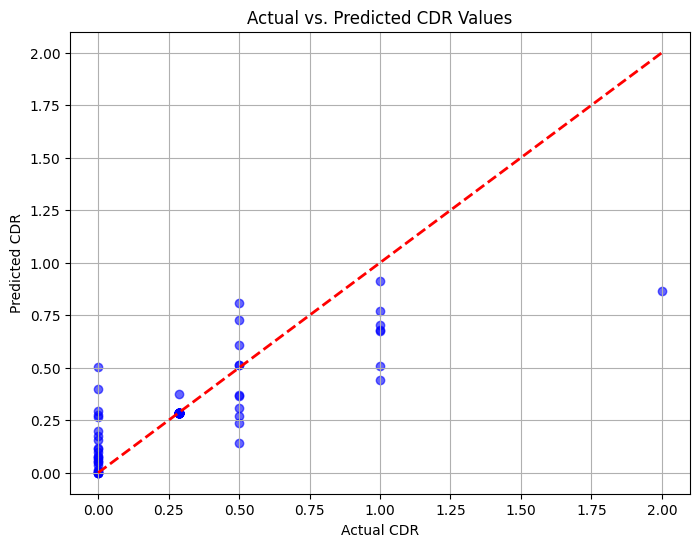

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare actual vs. predicted CDR values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.xlabel('Actual CDR')
plt.ylabel('Predicted CDR')
plt.title('Actual vs. Predicted CDR Values')
plt.grid(True)

# Add a diagonal line to visualize perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Display the plot
plt.show()


In [ ]:
# Input your own data to get a prediction

def predict_cdr(model, input_data):
    """
    Parameters:
    - model: Trained regression model (e.g., Linear Regression)
    - input_data: numpy array with your data

    Returns:
    - Predicted CDR (a float)
    """
    # Ensuring that input_data has the correct number of features
    if len(input_data) != 8:
        raise ValueError("Input data should contain 8 values: 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'")

    # Convert input_data to a NumPy array and reshape it for prediction
    input_data = np.array(input_data).reshape(1, -1)

    # Make the prediction using the trained model
    predicted_cdr = model.predict(input_data)

    return predicted_cdr[0]  # Return the predicted CDR as a float


# input_data: A list or NumPy array containing the input parameters IN THE ORDER: 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'
input_data = np.array([0,49,4,0,29,1564,0.734,1.122])
# NOTE: F=0, M=1 (this took me way too long to fix)
print(predict_cdr(model, input_data)) #Should print close to 0

# more tests
# NOTE: this accuracy may be due to overfitting. Finding new data is instrumental
input_data = np.array([1,82,2,3,27,1420,0.71,1.236])
print(predict_cdr(model, input_data)) #Should print close to .5

input_data = np.array([0,80,3,2,20,1732,0.692,1.013])
print(predict_cdr(model, input_data)) #Should print close to 1

input_data = np.array([1,86,1,4,15,1512,0.665,1.161])
print(predict_cdr(model, input_data)) #Should print close to 2

0.165
0.495
0.86
1.595


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
